In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [25]:
%matplotlib inline
from plotnine import *
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../results/weights/edgecut-approx/delta=0.01_epsilon=0.001_graph=karate_key=karate_rho=0.2_threads=70.txt', sep=' ', header=None, names=('source', 'target', 'weight'), dtype={'source': np.int64, 'target': np.int64, 'weight': np.float64})

/home/emallson/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


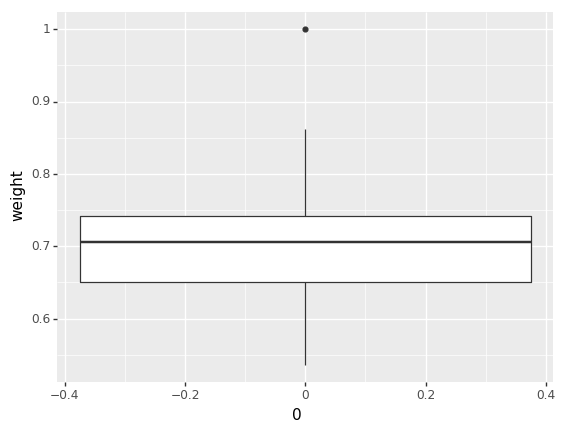

<ggplot: (8762009585356)>

In [4]:
ggplot(df, aes(x=0, y='weight')) + geom_boxplot()

In [5]:
g = nx.from_edgelist([(row['source'], row['target'], {'weight': row['weight']}) for _, row in df.iterrows()])

In [195]:
pos = nx.layout.spectral_layout(g, weight=None)

In [39]:
class_values = {'Mr. Hi': 0, 'Officer': 1}

In [188]:
nx.layout.kamada_kawai_layout?

In [58]:
nx.set_edge_attributes(g, nx.edge_betweenness(g), name='btw')

In [116]:
plt.cm.cubehelix?

In [172]:
def draw_scale(g, pos, attr, path=None):
    fig, ax = plt.subplots(figsize=(3, 1.5), dpi=100)
    officer_nodes = [n for n, c in g.nodes(data='club') if c == 'Officer']
    nonofficer_nodes = [n for n, c in g.nodes(data='club') if c != 'Officer']
    nx.draw_networkx_nodes(g, pos, nodelist=officer_nodes, node_shape='s', node_color=[plt.cm.Accent.colors[-2]], ax=ax, node_size=10)
    nx.draw_networkx_nodes(g, pos, nodelist=nonofficer_nodes, node_shape='o', node_color=[plt.cm.Accent.colors[-1]], ax=ax, node_size=10)
    nx.draw_networkx_edges(g, pos, edge_color=np.log(list(nx.get_edge_attributes(g, attr).values())), edge_cmap=plt.cm.Greys_r)
    ax.axis('off')
    
    if path is not None:
        fig.savefig(path)
    return fig, ax

(<Figure size 300x150 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f80de0dc710>)

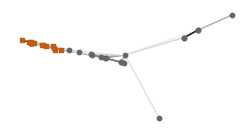

In [196]:
draw_scale(g, pos, 'btw')

(<Figure size 300x150 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f80de09b780>)

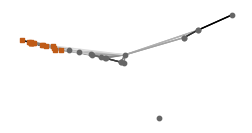

In [197]:
draw_scale(g, pos, 'weight')

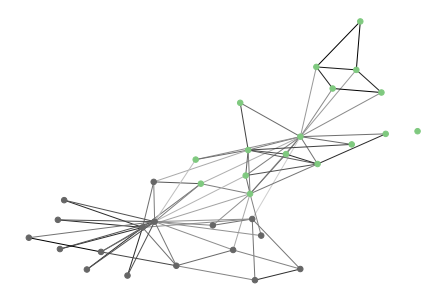

In [61]:
nx.draw(g, pos, node_color=[class_values[c] for c in nx.get_node_attributes(g, 'club').values()], cmap=plt.cm.Accent, edge_color=list(nx.get_edge_attributes(g, 'weight').values()), node_size=30, edge_cmap=plt.cm.Greys_r)

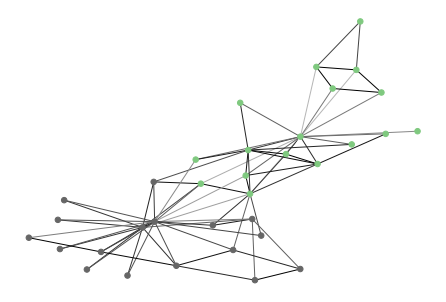

In [60]:
nx.draw(g, pos, node_color=[class_values[c] for c in nx.get_node_attributes(g, 'club').values()], cmap=plt.cm.Accent, edge_color=list(nx.get_edge_attributes(g, 'btw').values()), node_size=30, edge_cmap=plt.cm.Greys_r)

In [10]:
!pip install --upgrade networkx

Requirement already up-to-date: networkx in /home/emallson/anaconda3/lib/python3.7/site-packages (2.3)


In [29]:
karate = nx.karate_club_graph()

In [34]:
gm = nx.algorithms.isomorphism.GraphMatcher(karate, g)
gm.is_isomorphic()

True

In [37]:
nx.set_node_attributes(g, {gm.mapping[k]: v for k, v in karate.nodes(data='club')}, name='club')

In [38]:
g.nodes(data='club')

NodeDataView({0.0: 'Mr. Hi', 1.0: 'Mr. Hi', 2.0: 'Mr. Hi', 3.0: 'Mr. Hi', 4.0: 'Mr. Hi', 5.0: 'Mr. Hi', 6.0: 'Mr. Hi', 7.0: 'Mr. Hi', 8.0: 'Mr. Hi', 9.0: 'Mr. Hi', 10.0: 'Mr. Hi', 11.0: 'Mr. Hi', 12.0: 'Mr. Hi', 13.0: 'Mr. Hi', 14.0: 'Mr. Hi', 15.0: 'Mr. Hi', 16.0: 'Officer', 17.0: 'Officer', 18.0: 'Officer', 19.0: 'Officer', 20.0: 'Officer', 21.0: 'Officer', 22.0: 'Mr. Hi', 23.0: 'Officer', 24.0: 'Officer', 25.0: 'Officer', 26.0: 'Officer', 27.0: 'Officer', 28.0: 'Officer', 29.0: 'Officer', 30.0: 'Officer', 31.0: 'Officer', 32.0: 'Officer', 33.0: 'Officer'}, data='club')